# Random Noise Detection and Removal 

This notebook is based on recreating and justifying :
- https://www.kaggle.com/code/raddar/the-data-has-random-uniform-noise-added
- https://www.kaggle.com/competitions/amex-default-prediction/discussion/327651


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


In [3]:
df = pd.read_csv('./raw_data/train_data.csv', usecols=['B_2'])
df

,B_2
0,1.006838
1,1.000653
2,1.009672
3,1.002700
4,1.000727
...,...
5531446,0.828199
5531447,0.812610
5531448,0.815422
5531449,1.003541


<Figure size 1200x800 with 0 Axes>

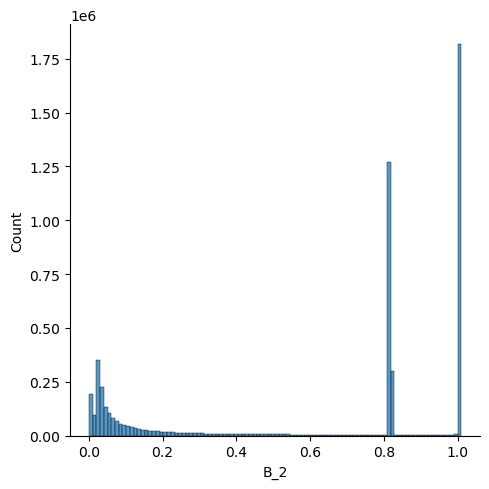

In [8]:
# Plotting Distribution of B_2 feature

plt.figure(figsize=(12,8))
sns.displot(data=df['B_2'])
plt.show()


<Figure size 640x480 with 0 Axes>

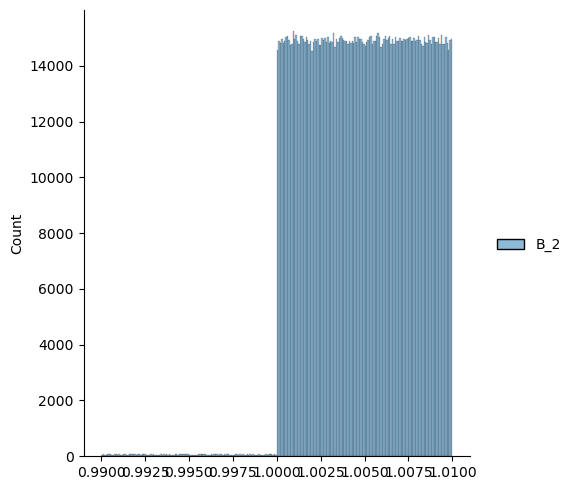

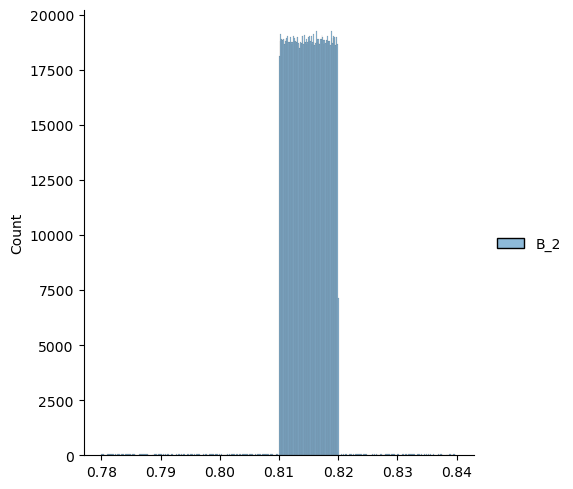

In [28]:
# Zooming into Peaks

plt.figure()
sns.displot(df.loc[df['B_2'] > 0.99])
sns.displot(df.loc[(df['B_2'] > 0.78) & (df['B_2'] < 0.84)], bins=500)
plt.show()


In [26]:
# Finding the number of unique values in B_2 feature

unique_b_2_values = len(df['B_2'].unique())

percentage_unique_b_2_values = (len(df['B_2'].unique()) / len(df['B_2']) ) * 100

print(f"Number of unique values in feature B_2 is {unique_b_2_values}")
print(f"Number of values in feature B_2 {len(df['B_2'])}")
print(f"Percentage of unique values in feature B_2 is {percentage_unique_b_2_values:.2f}%")

Number of unique values in feature B_2 is 5529436
Number of values in feature B_2 5531451
Percentage of unique values in feature B_2 is 99.96%


<Figure size 1200x800 with 0 Axes>

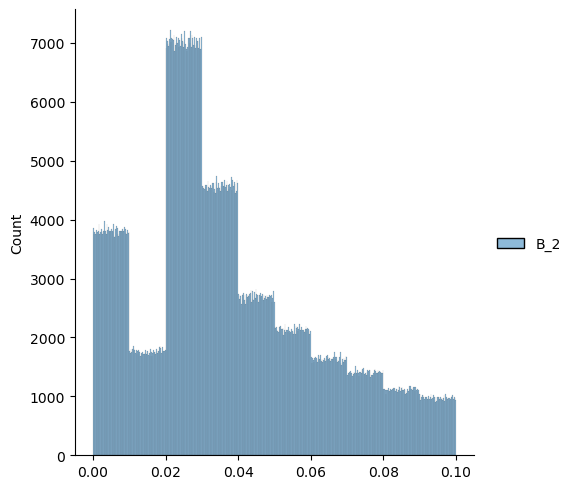

In [32]:
# First peak 

plt.figure(figsize=(12,8))
sns.displot(df.loc[(df['B_2'] > 0) & (df['B_2'] < 0.1)], bins=500)
plt.show()


# Understanding Peaks 

We have 3 Peaks 

(1) 0 - 0.5 - These peaks are justifiable since most people dont spend much on credit card to they would be in the lower end of the distribution
(2) 0.81 to 0.82 - ??
(3) 1 to 1.01 - People who maxout limit on credit card

# Conclusion 
By default the credit card should have high cardinality, by many user should default at $0 and max value in this case 1. In this case there is high cardinality centered around both min and max value. This suggest creator have normalised values between [0,1] and then added uniform random noise [0, 0.01]. 

Uniform random noise is clear since the distribution is a straight line!